### Titanic Veri Görselleştirme

## Kütüphaneleri yükle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Veriyi Yükle

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train.shape, df_test.shape

((891, 12), (418, 11))

### Keşifsel Veri Analizi

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: ylabel='count'>

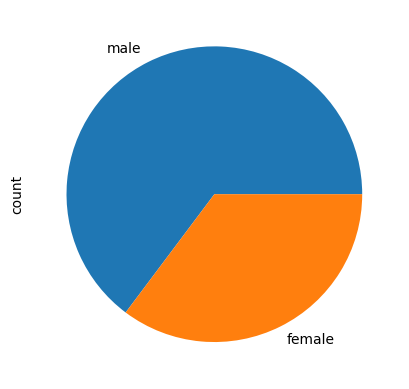

In [6]:
df_train['Sex'].value_counts().plot(kind='pie')

<Axes: xlabel='Sex', ylabel='Survived'>

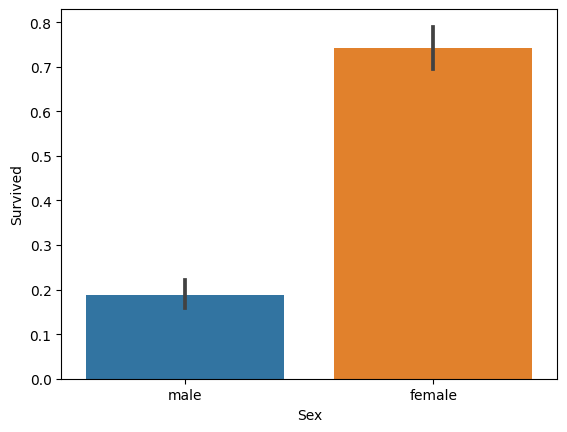

In [7]:
sns.barplot(x='Sex' , y= 'Survived' , data=df_train)

<Axes: ylabel='count'>

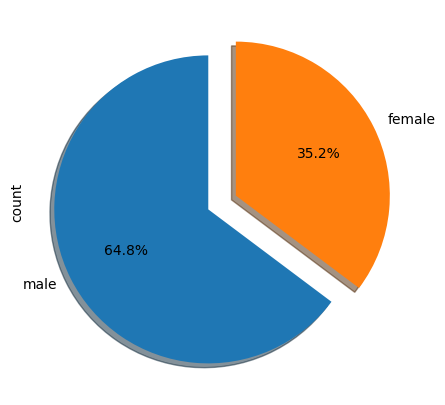

In [8]:
df_train['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.1,0.1], startangle=90, figsize=(5,5))

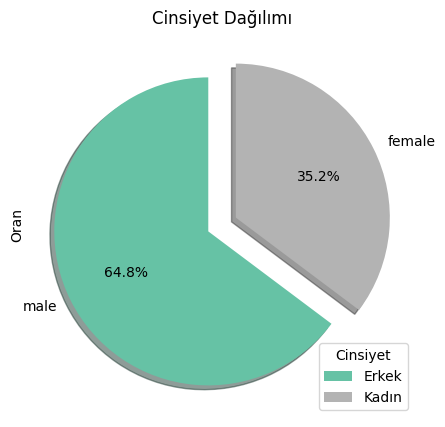

In [9]:
df_train['Sex'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    shadow=True,
                                    startangle=90,
                                    ylabel='Sayı',
                                    explode=[0.1,0.1],
                                    cmap='Set2',
                                    figsize=(5,5),
                                   title='Cinsiyet Dağılımı')
plt.ylabel('Oran');
#plt.xticks(['male','female'],['Erkek','Kadın']);
plt.legend(title='Cinsiyet',labels=['Erkek','Kadın']);

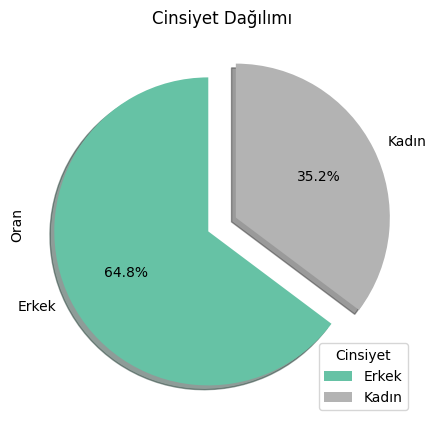

In [10]:
sex_counts = df_train['Sex'].value_counts()
sex_counts.index = sex_counts.index.map({'male': 'Erkek', 'female': 'Kadın'})
fig, ax = plt.subplots(figsize=(5, 5))
sex_counts.plot(kind='pie', 
                autopct='%1.1f%%', 
                shadow=True,
                startangle=90,
                explode=[0.1, 0.1],
                cmap='Set2',
                ax=ax)

ax.set_title('Cinsiyet Dağılımı')
ax.set_ylabel('Oran')
ax.legend(title='Cinsiyet')

plt.show()

#fig, ax = plt.subplots(figsize=(5, 5)): Grafik boyutunu ayarlamak için bir Figure ve Axes objesi oluşturur. Bu, grafiği Kaggle notebook'larında daha iyi kontrol etmenizi sağlar.
#sex_counts.plot(kind='pie', ax=ax, ...): Grafiği doğrudan ax üzerinde çizeriz. Bu, grafiği matplotlib'in subplots sisteminde kontrol etmenize olanak sağlar.
#ax.set_title('Cinsiyet Dağılımı'): Grafiğin başlığını ayarlar.
#ax.set_ylabel('Oran'): Y ekseninin etiketini ayarlar. Ancak pasta grafiğinde genellikle bu etiket görünmeyebilir.
#ax.legend(title='Cinsiyet'): Efsaneyi ayarlar ve başlığını Türkçe yapar.
#plt.show(): Grafiği görüntüler. Kaggle notebook'larında genellikle bu fonksiyon grafiğin gösterilmesi için yeterlidir.

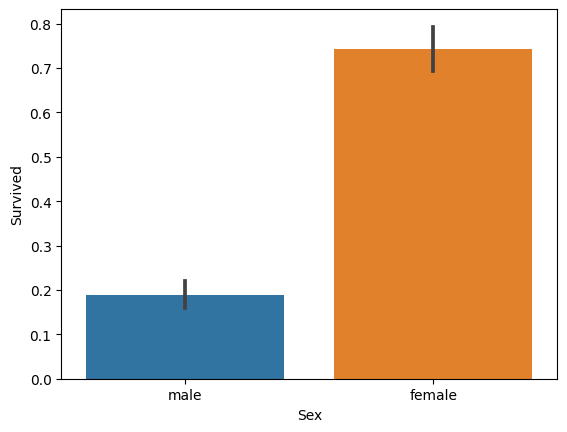

In [11]:
sns.barplot(x='Sex' , y='Survived' ,data=df_train);

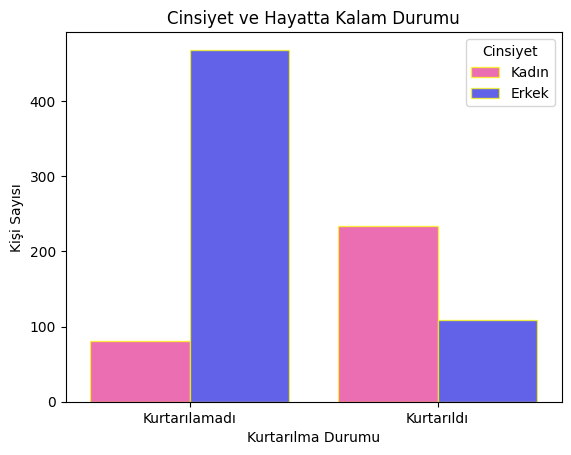

In [12]:
sns.countplot(x='Survived',hue='Sex',
              data=df_train,
              palette={'male':'blue','female':'#FF1493'},
              hue_order=['female','male'],
              dodge=True,
              alpha=0.7,
              edgecolor='yellow',
             );
#plt.legend(loc='upper right'); etiketin konumunu belirler
plt.title('Cinsiyet ve Hayatta Kalam Durumu');
plt.xlabel('Kurtarılma Durumu');
plt.ylabel('Kişi Sayısı');
plt.xticks([0,1],['Kurtarılamadı','Kurtarıldı']);
plt.title('Cinsiyet ve Hayatta Kalam Durumu');
plt.xlabel('Kurtarılma Durumu');
plt.ylabel('Kişi Sayısı');
plt.xticks([0,1],['Kurtarılamadı','Kurtarıldı']);
plt.legend(title='Cinsiyet',labels=['Kadın','Erkek']);

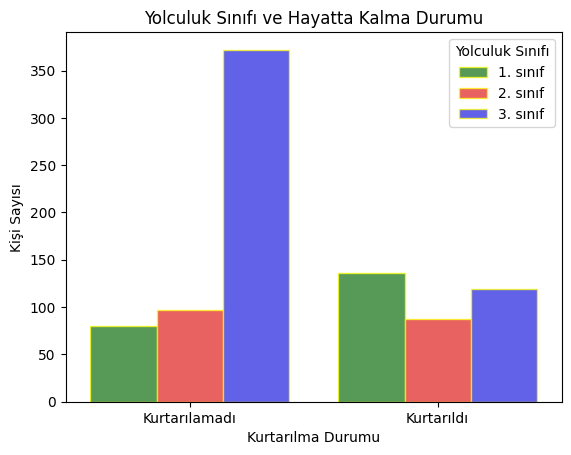

In [13]:
sns.countplot(x='Survived',hue='Pclass',
              data=df_train,
              palette={1:'green',2:'red',3:'blue'},
              hue_order=[1,2,3],
              dodge=True,
              alpha=0.7,
              edgecolor='yellow',
             );
#plt.legend(loc='upper right'); etiketin konumunu belirler
plt.title('Yolculuk Sınıfı ve Hayatta Kalma Durumu');
plt.xlabel('Kurtarılma Durumu');
plt.ylabel('Kişi Sayısı');
plt.xticks([0,1],['Kurtarılamadı','Kurtarıldı']);
plt.legend(title='Yolculuk Sınıfı',labels=['1. sınıf','2. sınıf','3. sınıf']);


In [14]:
import warnings
warnings.filterwarnings('ignore')

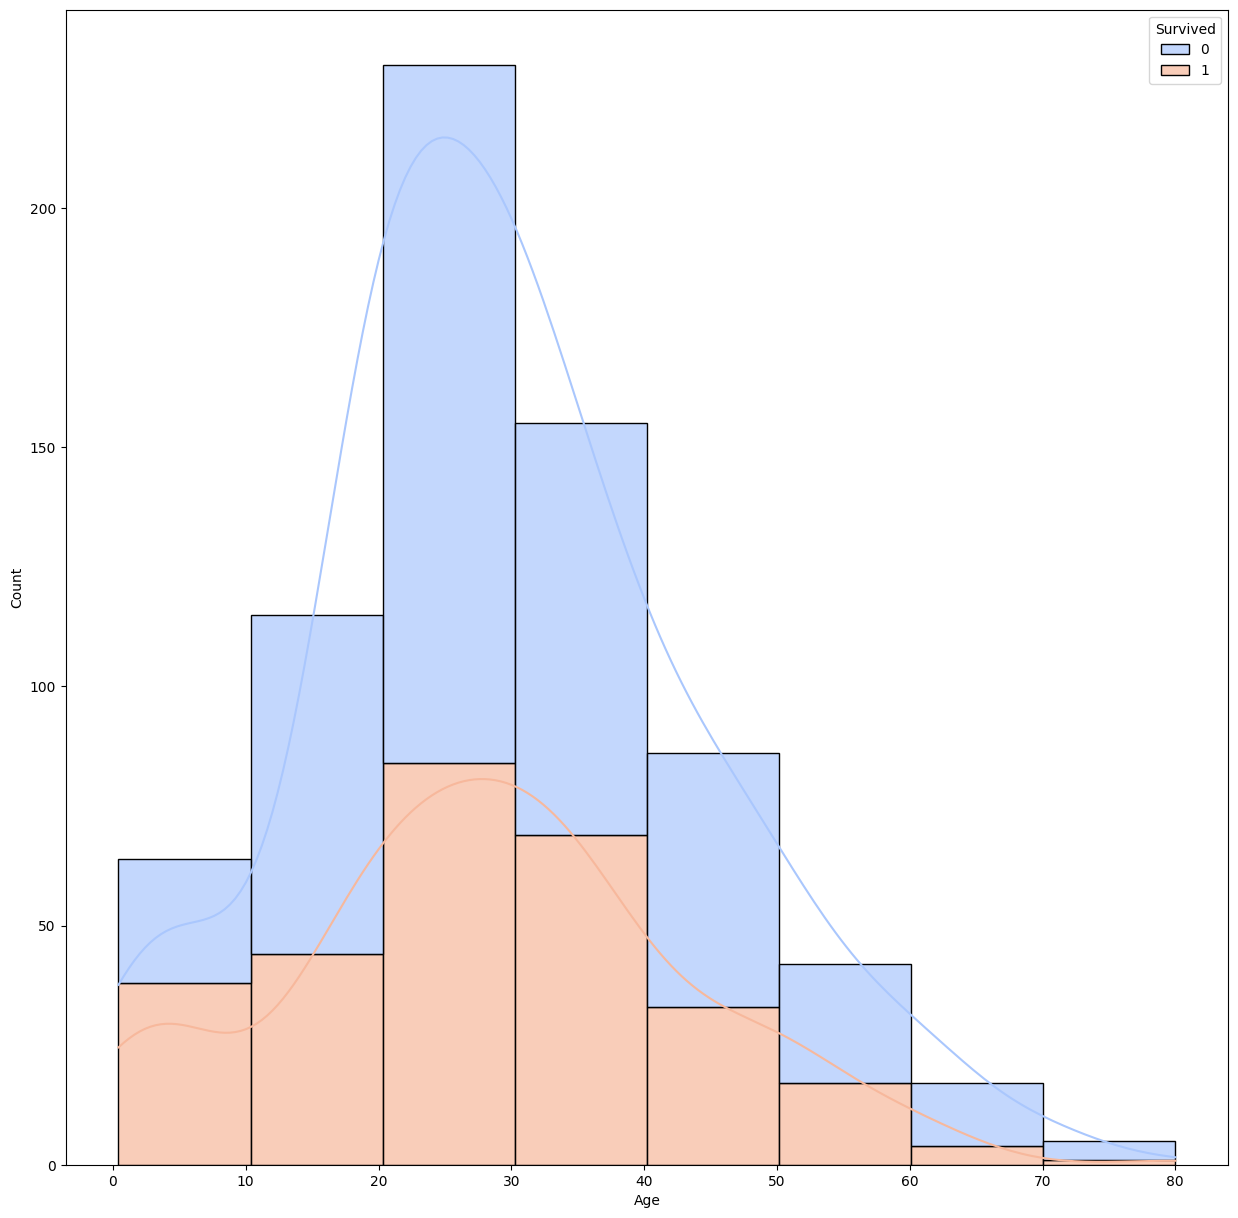

In [15]:
plt.figure(figsize=(15,15))
df_4=df_train.reset_index(drop=True)
sns.histplot(data=df_4, x='Age', hue='Survived', multiple='stack',
            kde=True, palette='coolwarm', bins=8,
            alpha=.7);